# HR Analytics

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style options for Plot
plt.style.use('ggplot')
# DataFrame's Columns Settings
pd.set_option('display.max_columns', 50)

In [2]:
# Reading HR Data (.xlsx)
hr_data = pd.read_excel("assets/excel_file/HR Data.xlsx")

## Data Exploration

In [3]:
# Top view of my data
hr_data.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,Marital Status,Over Time,Over18,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Education,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,Single,Yes,Y,0,41,0,1102,1,Associates Degree,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,Married,No,Y,3,49,1,279,8,High School,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,Single,Yes,Y,3,37,0,1373,2,Associates Degree,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,Married,Yes,Y,3,33,1,1392,3,Master's Degree,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,Married,No,Y,3,27,1,591,2,High School,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,2,2,2,2


In [4]:
# Dimension of dataset
hr_data.shape

(1470, 39)

In [5]:
# Dataset Columns
hr_data.columns

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'emp no', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Over18',
       'Training Times Last Year', 'Age', 'CF_current Employee', 'Daily Rate',
       'Distance From Home', 'Education', 'Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

In [6]:
# Top view of data frame and its columns
hr_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [7]:
# Numerical Data Description
hr_data.describe()

,Employee Number,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,36.923810,0.838776,802.485714,9.192517,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,1.289271,9.135373,0.367863,403.509100,8.106864,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,18.000000,0.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,30.000000,1.000000,465.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,3.000000,36.000000,1.000000,802.000000,7.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,3.000000,43.000000,1.000000,1157.000000,14.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,6.000000,60.000000,1.000000,1499.000000,29.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Preparation

In [8]:
# Dorpping Columns
hr_data = hr_data[['Attrition', 'Business Travel', 
                   #'CF_age band', 
                   #'CF_attrition label',
                   'Department', 
                   'Education Field', 
                   #'emp no', 
                   'Employee Number', 'Gender',
                   'Job Role', 'Marital Status', 'Over Time', 
                   #'Over18',
                   #'Training Times Last Year', 
                   'Age',
                   #'CF_current Employee', 
                   #'Daily Rate',
                   'Distance From Home', 'Education', 
                   #'Employee Count',
                   'Environment Satisfaction', 
                   #'Hourly Rate', 'Job Involvement',
                   #'Job Level', 
                   'Job Satisfaction', 'Monthly Income', 
                   #'Monthly Rate',
                   #'Num Companies Worked', 
                   'Percent Salary Hike', 
                   'Performance Rating',
                   #'Relationship Satisfaction', 
                   #'Standard Hours', 
                   'Stock Option Level',
                   'Total Working Years', 
                   #'Work Life Balance', 
                   'Years At Company',
                   'Years In Current Role', 'Years Since Last Promotion',
                   'Years With Curr Manager'
                   ]].copy()

In [9]:
# Column renaming
hr_data = hr_data.rename({
    'Business Travel': 'Business_Travel',
    'Education Field': 'Education_Field',
    'Employee Number': 'Employee_Number',
    'Job Role': 'Job_Role',
    'Marital Status': 'Marital_Status',
    'Over Time': 'Over_Time',
    'Training Times Last Year': 'Training_Times(PY)',
    'Daily Rate': 'Daily_Rate',
    'Distance From Home': 'Distance_From_Home',
    'Environment Satisfaction': 'Environment_Satisfaction',
    'Hourly Rate': 'Hourly_Rate',
    'Job Involvement': 'Job_Involvement',
    'Job Level': 'Job_Level',
    'Job Satisfaction': 'Job_Satisfaction',
    'Monthly Income': 'Monthly_Income',
    'Monthly Rate': 'Monthly_Rate',
    'Num Companies Worked': 'Num_Companies_Worked',
    'Percent Salary Hike': 'Percent_Salary_Hike',
    'Performance Rating': 'Performance_Rating',
    'Relationship Satisfaction': 'Relationship_Satisfaction',
    'Standard Hours': 'Standard_Hours',
    'Stock Option Level': 'Stock_Option_Level',
    'Total Working Years': 'Total_Working_Years',
    'Work Life Balance': 'Work_Life_Balance',
    'Years At Company': 'Years_At_Company',
    'Years In Current Role': 'Years_In_Current_Role',
    'Years Since Last Promotion': 'Years_Since_Last_Promotion',
    'Years With Curr Manager': 'Years_With_Curr_Manager'
    }, axis=1)

In [10]:
# Type Conversion
hr_data = hr_data.astype(
    {
        'Attrition': 'category',
        'Business_Travel': 'category',
        'Department': 'category',
        'Education_Field': 'category',
        'Gender': 'category',
        'Job_Role': 'category',
        'Marital_Status': 'category',
        'Over_Time': 'category',
        'Education': 'category'
    }
)

In [11]:
hr_data.head()

,Attrition,Business_Travel,Department,Education_Field,Employee_Number,Gender,Job_Role,Marital_Status,Over_Time,Age,Distance_From_Home,Education,Environment_Satisfaction,Job_Satisfaction,Monthly_Income,Percent_Salary_Hike,Performance_Rating,Stock_Option_Level,Total_Working_Years,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
0,Yes,Travel_Rarely,Sales,Life Sciences,1,Female,Sales Executive,Single,Yes,41,1,Associates Degree,2,4,5993,11,3,0,8,6,4,0,5
1,No,Travel_Frequently,R&D,Life Sciences,2,Male,Research Scientist,Married,No,49,8,High School,3,2,5130,23,4,1,10,10,7,1,7
2,Yes,Travel_Rarely,R&D,Other,4,Male,Laboratory Technician,Single,Yes,37,2,Associates Degree,4,3,2090,15,3,0,7,0,0,0,0
3,No,Travel_Frequently,R&D,Life Sciences,5,Female,Research Scientist,Married,Yes,33,3,Master's Degree,4,3,2909,11,3,0,8,8,7,3,0
4,No,Travel_Rarely,R&D,Medical,7,Male,Laboratory Technician,Married,No,27,2,High School,1,2,3468,12,3,1,6,2,2,2,2


In [12]:
# Finding Missing values
hr_data.isna().sum()

Attrition                     0
Business_Travel               0
Department                    0
Education_Field               0
Employee_Number               0
Gender                        0
Job_Role                      0
Marital_Status                0
Over_Time                     0
Age                           0
Distance_From_Home            0
Education                     0
Environment_Satisfaction      0
Job_Satisfaction              0
Monthly_Income                0
Percent_Salary_Hike           0
Performance_Rating            0
Stock_Option_Level            0
Total_Working_Years           0
Years_At_Company              0
Years_In_Current_Role         0
Years_Since_Last_Promotion    0
Years_With_Curr_Manager       0
dtype: int64

In [13]:
# Finding duplicate values
hr_data.duplicated().sum()

0

## Feature Understanding

In [14]:
# Attrition Count
hr_data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [15]:
# Business Travel
hr_data['Business_Travel'].value_counts()

Business_Travel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [16]:
# Department
hr_data['Department'].value_counts()

Department
R&D      961
Sales    446
HR        63
Name: count, dtype: int64

In [17]:
# Education Field
hr_data['Education_Field'].value_counts()

Education_Field
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [18]:
# Gender Distribution
hr_data['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [19]:
# Job Roles
hr_data['Job_Role'].value_counts()

Job_Role
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [20]:
# Mariatal Status
hr_data['Marital_Status'].value_counts()

Marital_Status
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [21]:
# Over time
hr_data['Over_Time'].value_counts()

Over_Time
No     1054
Yes     416
Name: count, dtype: int64

In [22]:
# Education
hr_data['Education'].value_counts()

Education
Bachelor's Degree    572
Master's Degree      398
Associates Degree    282
High School          170
Doctoral Degree       48
Name: count, dtype: int64

In [23]:
# Numeric Features
hr_data.describe()

,Employee_Number,Age,Distance_From_Home,Environment_Satisfaction,Job_Satisfaction,Monthly_Income,Percent_Salary_Hike,Performance_Rating,Stock_Option_Level,Total_Working_Years,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,9.192517,2.721769,2.728571,6502.931293,15.209524,3.153741,0.793878,11.279592,7.008163,4.229252,2.187755,4.123129
std,602.024335,9.135373,8.106864,1.093082,1.102846,4707.956783,3.659938,0.360824,0.852077,7.780782,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,1.000000,1.000000,1.000000,1009.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2.000000,2.000000,2.000000,2911.000000,12.000000,3.000000,0.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,7.000000,3.000000,3.000000,4919.000000,14.000000,3.000000,1.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,14.000000,4.000000,4.000000,8379.000000,18.000000,3.000000,1.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,60.000000,29.000000,4.000000,4.000000,19999.000000,25.000000,4.000000,3.000000,40.000000,40.000000,18.000000,15.000000,17.000000


## Feature Relationships

In [24]:
# Pair-wise Correlation
hr_data.corr(numeric_only=True).style.background_gradient(cmap='RdYlGn', axis=None)

,Employee_Number,Age,Distance_From_Home,Environment_Satisfaction,Job_Satisfaction,Monthly_Income,Percent_Salary_Hike,Performance_Rating,Stock_Option_Level,Total_Working_Years,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
Employee_Number,1.000000,-0.010145,0.032916,0.017621,-0.046247,-0.014829,-0.012944,-0.020359,0.062227,-0.014365,-0.011240,-0.008416,-0.009019,-0.009197
Age,-0.010145,1.000000,-0.001686,0.010146,-0.004892,0.497855,0.003634,0.001904,0.037510,0.680381,0.311309,0.212901,0.216513,0.202089
Distance_From_Home,0.032916,-0.001686,1.000000,-0.016075,-0.003669,-0.017014,0.040235,0.027110,0.044872,0.004628,0.009508,0.018845,0.010029,0.014406
Environment_Satisfaction,0.017621,0.010146,-0.016075,1.000000,-0.006784,-0.006259,-0.031701,-0.029548,0.003432,-0.002693,0.001458,0.018007,0.016194,-0.004999
Job_Satisfaction,-0.046247,-0.004892,-0.003669,-0.006784,1.000000,-0.007157,0.020002,0.002297,0.010690,-0.020185,-0.003803,-0.002305,-0.018214,-0.027656
Monthly_Income,-0.014829,0.497855,-0.017014,-0.006259,-0.007157,1.000000,-0.027269,-0.017120,0.005408,0.772893,0.514285,0.363818,0.344978,0.344079
Percent_Salary_Hike,-0.012944,0.003634,0.040235,-0.031701,0.020002,-0.027269,1.000000,0.773550,0.007528,-0.020608,-0.035991,-0.001520,-0.022154,-0.011985
Performance_Rating,-0.020359,0.001904,0.027110,-0.029548,0.002297,-0.017120,0.773550,1.000000,0.003506,0.006744,0.003435,0.034986,0.017896,0.022827
Stock_Option_Level,0.062227,0.037510,0.044872,0.003432,0.010690,0.005408,0.007528,0.003506,1.000000,0.010136,0.015058,0.050818,0.014352,0.024698
Total_Working_Years,-0.014365,0.680381,0.004628,-0.002693,-0.020185,0.772893,-0.020608,0.006744,0.010136,1.000000,0.628133,0.460365,0.404858,0.459188


### Correlation to watch out for

- Monthly_Income - Total_Working_Years
- Performance_Rating - Salary_Hike
- Years_With_Manager - Years_At_Company

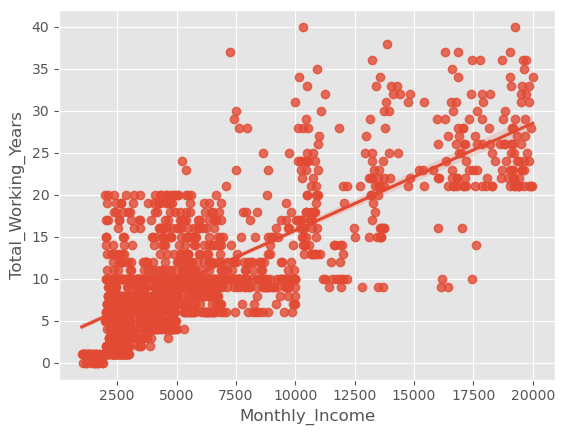

In [25]:
# Monthly Income and Total Working Years
sns.regplot(x='Monthly_Income', y='Total_Working_Years', data=hr_data);

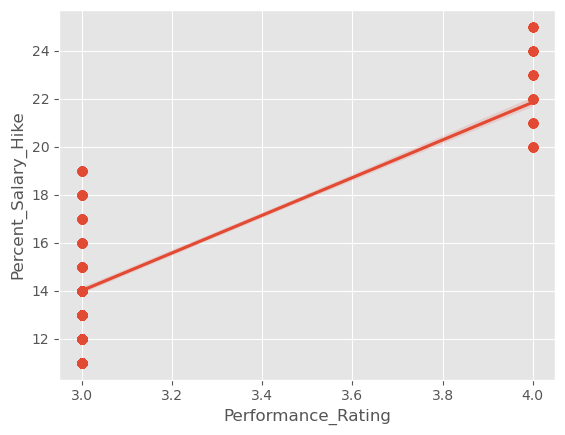

In [26]:
# Peformance Rating and Salary Hike
sns.regplot(x='Performance_Rating', y='Percent_Salary_Hike', data=hr_data);

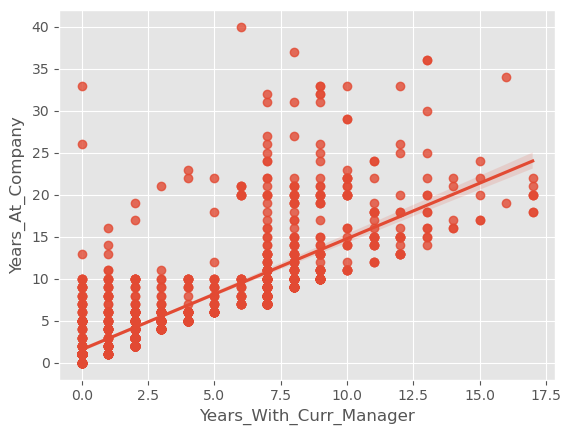

In [27]:
sns.regplot(x='Years_With_Curr_Manager', y='Years_At_Company', data=hr_data);

# Questions to Answer

- Attrition count and attrition rate
- Segment Attrition by:
    - Department
    - Job role
    - Gender
    - Marital status
    - Age-group
    - Business travel
    - Education field
    - Over-time
    - Education
 

### Attrition count and rate

In [28]:
# Overall Attrition Rate
number_of_employee = hr_data['Employee_Number'].count()
employees_left = (hr_data['Attrition'] == 'Yes').sum()
currently_employeed = (hr_data['Attrition'] == 'No').sum()
average_number_of_employee = hr_data['Employee_Number'].mean()

attrition_rate = (employees_left / number_of_employee) * 100

print(f"Total Employees: {number_of_employee}")
print(f"Attrtion Count: {employees_left}")
print(f"Attrition Rate: {attrition_rate.round(2)}%")
print(f"Currently Employeed: {currently_employeed}")

Total Employees: 1470
Attrtion Count: 237
Attrition Rate: 16.12%
Currently Employeed: 1233


### Attrition by Department

In [29]:
# Attrition count at each department
department_attrition = pd.crosstab(hr_data['Department'], hr_data['Attrition'], margins=True)
department_attrition

Attrition,No,Yes,All
Department,,,
HR,51,12,63
R&D,828,133,961
Sales,354,92,446
All,1233,237,1470


In [30]:
# Attrition rate at each department
(department_attrition.
 loc[:'Sales',:'Yes'].
 apply(lambda x: x/x.sum() * 100, axis=1)
 .round(2)
 .sort_values('Yes', ascending=False)
)

Attrition,No,Yes
Department,,
Sales,79.37,20.63
HR,80.95,19.05
R&D,86.16,13.84


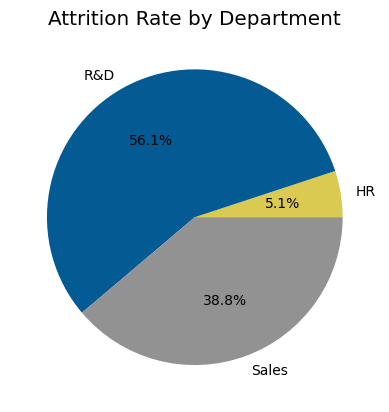

In [31]:
# Attririon rate by Department
department_attrition.iloc[:-1, 1].plot.pie(autopct="%1.1f%%",
                                          colors=['#dbca51', '#045a93', '#929292'],
                                          title='Attrition Rate by Department',
                                          ylabel="");

In [32]:
# Department vs Environment Satisfaction
department_environment_satisfaction = pd.crosstab(hr_data['Department'], hr_data['Environment_Satisfaction'], margins=True)
department_environment_satisfaction

Environment_Satisfaction,1,2,3,4,All
Department,,,,,
HR,11,12,26,14,63
R&D,187,177,292,305,961
Sales,86,98,135,127,446
All,284,287,453,446,1470


In [33]:
# Department vs Environmen Satifaction Percentage Share
department_environment_satisfaction.iloc[:-1, :-1].apply(lambda x: x/x.sum() * 100, axis=1).round(2)

Environment_Satisfaction,1,2,3,4
Department,,,,
HR,17.46,19.05,41.27,22.22
R&D,19.46,18.42,30.39,31.74
Sales,19.28,21.97,30.27,28.48


### Attrition by Job Role

In [34]:
# Attrition count with different Job Role
job_role_attrition = pd.crosstab(hr_data['Job_Role'], hr_data['Attrition'], margins=True)
job_role_attrition

Attrition,No,Yes,All
Job_Role,,,
Healthcare Representative,122,9,131
Human Resources,40,12,52
Laboratory Technician,197,62,259
Manager,97,5,102
Manufacturing Director,135,10,145
Research Director,78,2,80
Research Scientist,245,47,292
Sales Executive,269,57,326
Sales Representative,50,33,83


In [35]:
# Attrition rate with different Job Role
(job_role_attrition.
 loc[:'Sales Representative',:'Yes'].
 apply(lambda x: x/x.sum() * 100, axis=1)
 .round(2)
 .sort_values('Yes', ascending=False)
)

Attrition,No,Yes
Job_Role,,
Sales Representative,60.24,39.76
Laboratory Technician,76.06,23.94
Human Resources,76.92,23.08
Sales Executive,82.52,17.48
Research Scientist,83.90,16.10
Manufacturing Director,93.10,6.90
Healthcare Representative,93.13,6.87
Manager,95.10,4.90
Research Director,97.50,2.50


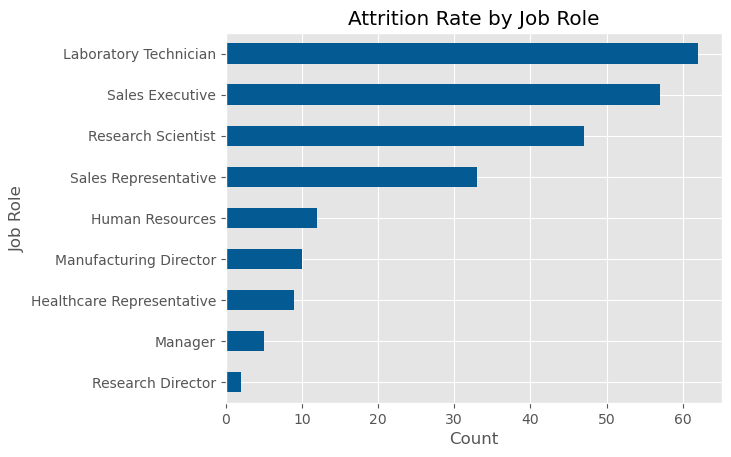

In [36]:
# Attrition rate by Job Role
job_role_attrition.iloc[:-1, 1].sort_values().plot.barh(
    color='#045a93',
    title='Attrition Rate by Job Role',
    xlabel='Count',
    ylabel='Job Role'
);

In [37]:
# Job Role vs Job Satisfaction
job_role_satisfaction = pd.crosstab(hr_data['Job_Role'], hr_data['Job_Satisfaction'], margins=True)
job_role_satisfaction

Job_Satisfaction,1,2,3,4,All
Job_Role,,,,,
Healthcare Representative,26,19,43,43,131
Human Resources,10,16,13,13,52
Laboratory Technician,56,48,75,80,259
Manager,21,21,27,33,102
Manufacturing Director,26,32,49,38,145
Research Director,15,16,27,22,80
Research Scientist,54,53,90,95,292
Sales Executive,69,54,91,112,326
Sales Representative,12,21,27,23,83


In [38]:
# Job Role Satisfaction Percentage Share
job_role_satisfaction.iloc[:-1, :-1].apply(lambda x: x/x.sum() * 100, axis=1).sort_values(1, ascending=False)

Job_Satisfaction,1,2,3,4
Job_Role,,,,
Laboratory Technician,21.621622,18.532819,28.957529,30.888031
Sales Executive,21.165644,16.564417,27.914110,34.355828
Manager,20.588235,20.588235,26.470588,32.352941
Healthcare Representative,19.847328,14.503817,32.824427,32.824427
Human Resources,19.230769,30.769231,25.000000,25.000000
Research Director,18.750000,20.000000,33.750000,27.500000
Research Scientist,18.493151,18.150685,30.821918,32.534247
Manufacturing Director,17.931034,22.068966,33.793103,26.206897
Sales Representative,14.457831,25.301205,32.530120,27.710843


### Attrition by Gender

In [39]:
# Attrition count with respect to gender
gender_attrition = pd.crosstab(hr_data['Gender'], hr_data['Attrition'], margins=True)
gender_attrition

Attrition,No,Yes,All
Gender,,,
Female,501,87,588
Male,732,150,882
All,1233,237,1470


In [40]:
# Attrition rate for gender
(gender_attrition.
 loc[:'Male',:'Yes'].
 apply(lambda x: x/x.sum() * 100, axis=1)
 .round(2)
 .sort_values('Yes', ascending=False)
)

Attrition,No,Yes
Gender,,
Male,82.99,17.01
Female,85.20,14.80


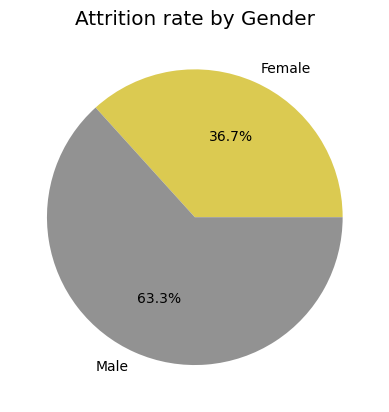

In [41]:
# Attrition rate by Gender
gender_attrition.iloc[:-1, 1].plot.pie(
    autopct="%1.1f%%",
    colors=['#dbca51', '#929292'],
    title='Attrition rate by Gender',
    ylabel=""
);

### Attrition by Marital Status

In [42]:
# Attrition count with respect to Marital Status
marital_attrition = pd.crosstab(hr_data['Marital_Status'], hr_data['Attrition'], margins=True)
marital_attrition

Attrition,No,Yes,All
Marital_Status,,,
Divorced,294,33,327
Married,589,84,673
Single,350,120,470
All,1233,237,1470


In [43]:
# Attrition rate for Marital Status
(marital_attrition.
 loc[:'Single',:'Yes'].
 apply(lambda x: x/x.sum() * 100, axis=1)
 .round(2)
 .sort_values('Yes', ascending=False)
)

Attrition,No,Yes
Marital_Status,,
Single,74.47,25.53
Married,87.52,12.48
Divorced,89.91,10.09


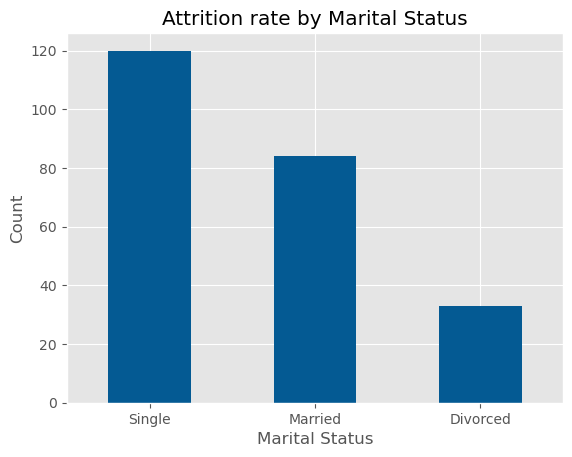

In [44]:
# Attrition rate by Marital Status
marital_attrition.iloc[:-1, 1].sort_values(ascending=False).plot.bar(
    color='#045a93',
    title='Attrition rate by Marital Status',
    xlabel="Marital Status",
    ylabel="Count",
    rot=0
);

### Attrition by Age-Group

In [45]:
# Attrition with respect to Age
bins=[18, 25, 35, 60, 100]
hr_data['age_band'] = pd.cut(hr_data['Age'], bins, right=False)

age_attrition = pd.crosstab(hr_data['age_band'], hr_data['Attrition'], margins=True)
age_attrition

Attrition,No,Yes,All
age_band,,,
"[18, 25)",59,38,97
"[25, 35)",442,112,554
"[35, 60)",727,87,814
"[60, 100)",5,0,5
All,1233,237,1470


In [46]:
# Attrition rate for Age
(age_attrition.
 iloc[:-1,:-1].
 apply(lambda x: x/x.sum() * 100, axis=1)
 .round(2)
 .sort_values('Yes', ascending=False)
)

Attrition,No,Yes
age_band,,
"[18, 25)",60.82,39.18
"[25, 35)",79.78,20.22
"[35, 60)",89.31,10.69
"[60, 100)",100.00,0.00


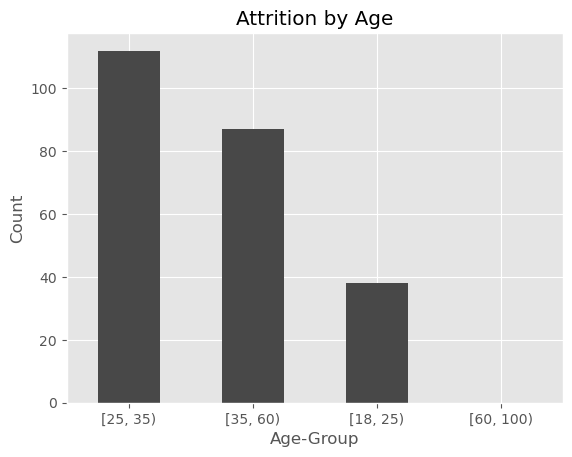

In [47]:
# Attrition by Age-Group
age_attrition.iloc[:-1, 1].sort_values(ascending=False).plot.bar(
    color='#484848',
    title='Attrition by Age',
    xlabel='Age-Group',
    ylabel='Count',
    rot=0
);

### Attrition by Business Tarvel

In [48]:
# Attrition count with respect to Business Travel
business_travel_attrition = pd.crosstab(hr_data['Business_Travel'], hr_data['Attrition'], margins=True)
business_travel_attrition

Attrition,No,Yes,All
Business_Travel,,,
Non-Travel,138,12,150
Travel_Frequently,208,69,277
Travel_Rarely,887,156,1043
All,1233,237,1470


In [49]:
# Attrition rate for Business Travel
(business_travel_attrition.
 loc[:'Travel_Rarely',:'Yes'].
 apply(lambda x: x/x.sum() * 100, axis=1)
 .round(2)
 .sort_values('Yes', ascending=False)
)

Attrition,No,Yes
Business_Travel,,
Travel_Frequently,75.09,24.91
Travel_Rarely,85.04,14.96
Non-Travel,92.00,8.00


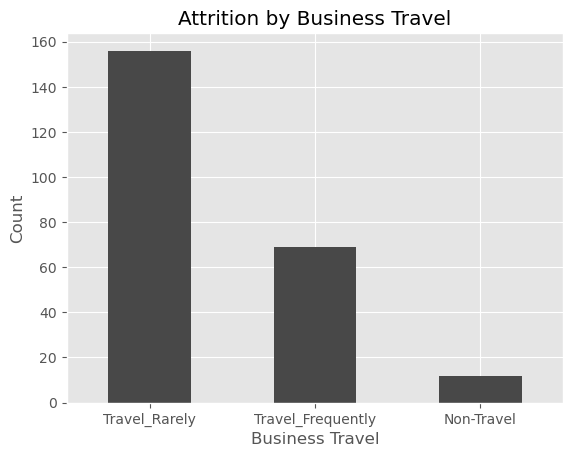

In [50]:
# Attrition by Business Travel
business_travel_attrition.iloc[:-1, 1].sort_values(ascending=False).plot.bar(
    color='#484848',
    title='Attrition by Business Travel',
    xlabel='Business Travel',
    ylabel='Count',
    rot=0
);

### Attrition by Education Field

In [51]:
# Attrition count with respect to Education Field
education_field_attrition = pd.crosstab(hr_data['Education_Field'], hr_data['Attrition'], margins=True)
education_field_attrition

Attrition,No,Yes,All
Education_Field,,,
Human Resources,20,7,27
Life Sciences,517,89,606
Marketing,124,35,159
Medical,401,63,464
Other,71,11,82
Technical Degree,100,32,132
All,1233,237,1470


In [52]:
# Attrition rate for Education Field
(education_field_attrition.
 loc[:'Technical Degree',:'Yes'].
 apply(lambda x: x/x.sum() * 100, axis=1)
 .round(2)
 .sort_values('Yes', ascending=False)
)

Attrition,No,Yes
Education_Field,,
Human Resources,74.07,25.93
Technical Degree,75.76,24.24
Marketing,77.99,22.01
Life Sciences,85.31,14.69
Medical,86.42,13.58
Other,86.59,13.41


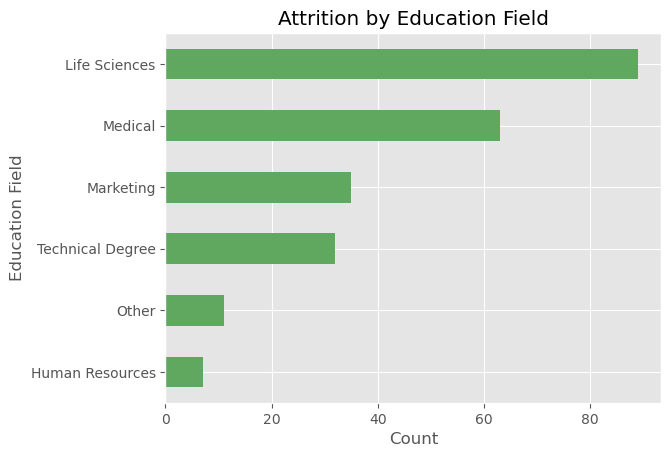

In [53]:
# Attrition by Education Field
education_field_attrition.iloc[:-1, 1].sort_values().plot.barh(
    color='#60a760',
    title='Attrition by Education Field',
    xlabel='Count',
    ylabel='Education Field'
);

### Attrition by Over Time

In [54]:
# Attrition count with respect to Over Time
over_time_attrition = pd.crosstab(hr_data['Over_Time'], hr_data['Attrition'], margins=True)
over_time_attrition

Attrition,No,Yes,All
Over_Time,,,
No,944,110,1054
Yes,289,127,416
All,1233,237,1470


In [55]:
# Attrition rate for Over Time
(over_time_attrition.
 loc[:'Yes',:'Yes'].
 apply(lambda x: x/x.sum() * 100, axis=1)
 .round(2)
 .sort_values('Yes', ascending=False)
)

Attrition,No,Yes
Over_Time,,
Yes,69.47,30.53
No,89.56,10.44


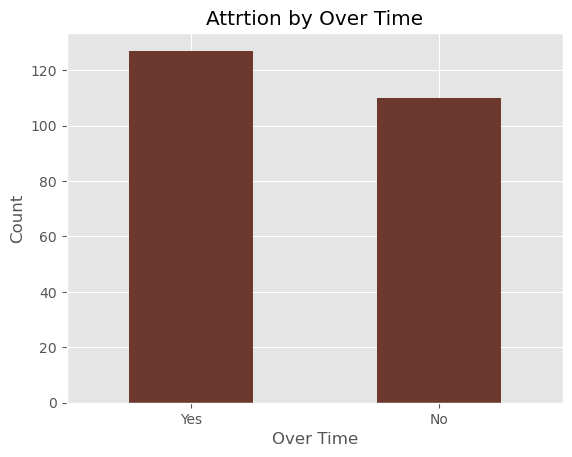

In [56]:
# Attrition by Over Time
over_time_attrition.iloc[:-1, 1].sort_values(ascending=False).plot.bar(
    color='#6d392e',
    title='Attrtion by Over Time',
    xlabel='Over Time',
    ylabel='Count',
    rot=0
);

In [57]:
# Over time vs Gender
over_time_gender = pd.crosstab([hr_data['Gender'], hr_data['Over_Time']], hr_data['Attrition'], margins=True)
over_time_gender

Attrition           No  Yes   All
Gender Over_Time                 
Female No          368   40   408
       Yes         133   47   180
Male   No          576   70   646
       Yes         156   80   236
All               1233  237  1470

In [58]:
# Over time vs Gender
over_time_gender.iloc[:-1, :-1].apply(lambda x: x/x.sum() * 100, axis=1).round(2)

Attrition            No    Yes
Gender Over_Time              
Female No         90.20   9.80
       Yes        73.89  26.11
Male   No         89.16  10.84
       Yes        66.10  33.90

### Attrition by Education

In [59]:
# Attrition count with respect to Education
education_attrition = pd.crosstab(hr_data['Education'], hr_data['Attrition'], margins=True)
education_attrition

Attrition,No,Yes,All
Education,,,
Associates Degree,238,44,282
Bachelor's Degree,473,99,572
Doctoral Degree,43,5,48
High School,139,31,170
Master's Degree,340,58,398
All,1233,237,1470


In [60]:
# Attrition rate for Education
(education_attrition.
 iloc[:-1,:-1].
 apply(lambda x: x/x.sum() * 100, axis=1)
 .round(2)
 .sort_values('Yes', ascending=False)
)

Attrition,No,Yes
Education,,
High School,81.76,18.24
Bachelor's Degree,82.69,17.31
Associates Degree,84.40,15.60
Master's Degree,85.43,14.57
Doctoral Degree,89.58,10.42


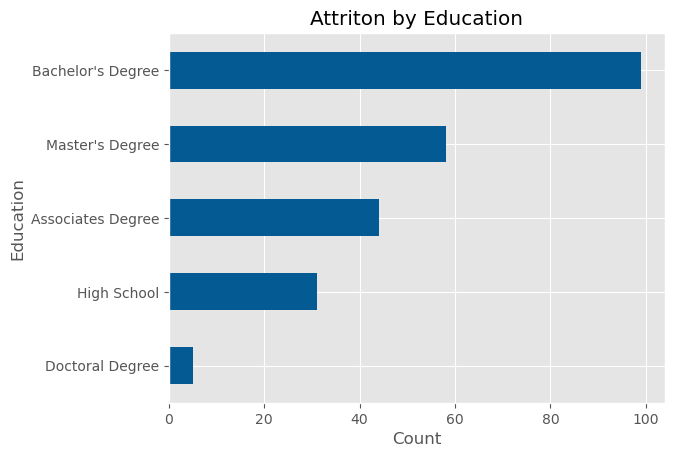

In [61]:
# Attrition by Education
education_attrition.iloc[:-1, 1].sort_values().plot.barh(
    color='#045a93',
    title='Attriton by Education',
    xlabel='Count',
    ylabel='Education'
);

### Attrition by Distance

In [62]:
average_distance = hr_data['Distance_From_Home'].mean()
hr_data['avg_dist'] = np.where(hr_data['Distance_From_Home'] > average_distance, 'Yes', 'No')

distance_attrition = pd.crosstab(hr_data['avg_dist'], hr_data['Attrition'], margins=True)
distance_attrition

Attrition,No,Yes,All
avg_dist,,,
No,807,133,940
Yes,426,104,530
All,1233,237,1470


In [63]:
distance_attrition.iloc[:-1, :-1].apply(lambda x: x/x.sum() * 100, axis=1).round(2)

Attrition,No,Yes
avg_dist,,
No,85.85,14.15
Yes,80.38,19.62
